# Matplotlib 2

Last time we used ```matplotlib```
to draw graphs of functions and smooth curves.

This time we'll draw:

- fractals
- trees

---

We'll also do:

- some boolean masks

---





In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Crible d'Ératosthène¶

Le crible d'Ératosthène est un procédé qui permet de trouver tous les nombres premiers inférieurs à un certain entier naturel donné N. Le crible d'Atkin est plus rapide mais plus complexe.


In [ ]:

#https://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n
def primes(n):
    """ Returns  array of primes, 2 <= p < n """
    sieve = np.ones(n, dtype=np.bool)
    sieve[::2] = False
    for i in range(3, int(np.sqrt(n))+1, 2):
        if sieve[i]:
            sieve[i*i::i] = False
    return np.nonzero(sieve)[0][1:]

In [2]:
! ../.g

[master 8ae4ab9] web
 1 file changed, 116 insertions(+), 15 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 4.56 KiB | 424.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io
   0760c31..8ae4ab9  master -> master


## Escalier de Cantor

L'escalier de Cantor, ou l'escalier du diable, est le graphe d'une fonction f continue croissante sur $[0, 1]$, telle que f(0) = 0 et f(1) = 1, qui est dérivable presque partout, la dérivée étant presque partout nulle. 

Il s'agit cependant d'une fonction 
- continue
- uniforment continue 
- mais pas absolument continue.

https://fr.wikipedia.org/wiki/Escalier_de_Cantor

https://www-fourier.ujf-grenoble.fr/~mcshane/programming.html

http://fichiers.vanlindt.be/Les%20fractales%20dans%20la%20cr%C3%A9ation%20graphique.pdf

In [45]:
        
def showGph(pts):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)

    #fig.set_size_inches(8,8)
    ax.set_aspect('equal')
    xs,ys = zip(*pts) #this transposes the array
    ax.plot(xs, ys)


In [35]:
def L(pts):
    return [ (x/3.0, y/2.0) for x,y in pts]
    
def R(pts):
    return [ (x/3.0 + 2./3, y/2.0 + .5) 
                for x,y in pts]


In [55]:
def staircase(d):
    zs = [(0,0),(1,1)]
    for i in range(d):
        zs = L(zs) + R(zs)
    showGph(zs)

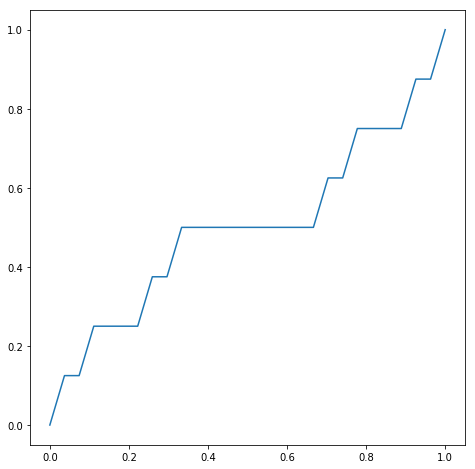

In [57]:
staircase(3)

In [52]:
M = np.diag([1/3,1/2])
M

array([[0.33333333, 0.        ],
       [0.        , 0.5       ]])

In [59]:
Z = np.ones((2,2))
Z[:,0] = 0
Z

array([[0., 1.],
       [0., 1.]])

In [84]:
L = np.dot(M,Z)
R = np.dot(M,Z) + np.array([2/3,1/2]).reshape(-1,1)
Z = np.hstack((L,R))

In [69]:
np.array([2/3,1/2]).reshape(-1,1)

array([[0.66666667],
       [0.5       ]])

In [169]:
def staircase2(d):
    
    def showGph(Z):
        fig, ax = plt.subplots()
        fig.set_size_inches(8,8)
        ax.set_aspect('equal')
        ax.plot(Z[0],Z[1])
        
    M = np.diag([1/3,1/2])
    Z = np.ones((2,2))
    Z[:,0] = 0
    for i in range(d):
        L = np.dot(M,Z)
        R = np.dot(M,Z) + np.array([2/3,1/2]).reshape(-1,1)
        Z = np.hstack((L,R))
        
    showGph(Z)
        

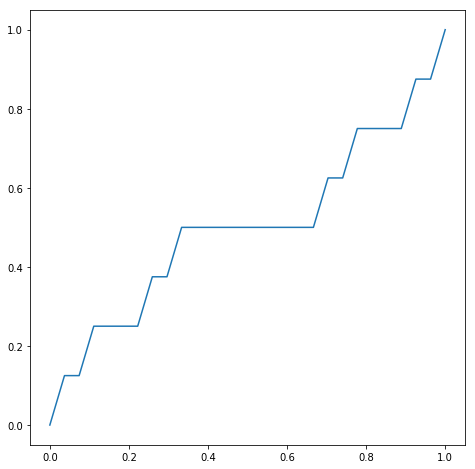

In [93]:
staircase2(3)

## Flocon de Koch

Le flocon de Koch est l'une des premières courbes fractales à avoir été décrites (bien avant l'invention du terme « fractal(e) »).

Elle a été inventée en 1904 par le mathématicien suédois Helge von Koch1.

[wiki](https://fr.wikipedia.org/wiki/Flocon_de_Koch)

[Pour savoir plus](https://fr.wikipedia.org/wiki/Flocon_de_Koch#Courbe_de_Koch)



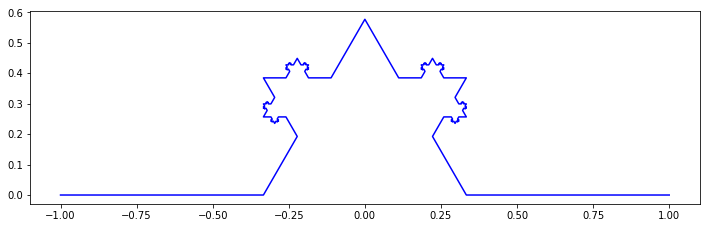

In [171]:
def plt_cplx(Z, 
             ax=plt, 
             sty='r'):
    X = [z.real for z in Z]
    Y = [z.imag for z in Z] 
    ax.plot(X,Y,sty)

Z = [-1, 1J*np.sqrt(3) , 1]
Z = [-1] + [z/3 for z in Z] + [1]

RR = (Z[-2] - Z[2])/2
CR = (Z[-2] + Z[2])/2

def R(Z):
    return [RR*z + CR for z in Z]
    
RL = (- Z[1] +  Z[2])/2
CL = (Z[1] + Z[2])/2

def L(Z):
    return [RL*z + CL for z in Z]

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.set_aspect('equal')
#plt_cplx(Z)
for i in range(5):
    Z = [-1] + L(Z) + R(Z) + [1]
plt_cplx(Z,ax=ax, sty='b')


https://github.com/macbuse/koch/blob/master/koch.ipynb

# un arbre

En informatique, un [arbre binaire](https://fr.wikipedia.org/wiki/Arbre_binaire#:~:text=En%20informatique%2C%20un%20arbre%20binaire,n%C5%93ud%20initial%20%C3%A9tant%20appel%C3%A9%20racine.)
est une structure de données qui peut se représenter sous la forme d'une hiérarchie dont chaque élément est appelé nœud, le nœud initial étant appelé racine. Dans un arbre binaire, chaque élément possède au plus deux éléments fils au niveau inférieur, habituellement appelés gauche et droit. Du point de vue de ces éléments fils, l'élément dont ils sont issus au niveau supérieur est appelé père.


For to make things neater I'll use 
- ```map``` to [avoid loops](https://realpython.com/python-map-function/)
- ```lambda``` to [create temporary functions](https://medium.com/better-programming/lambda-map-and-filter-in-python-4935f248593)


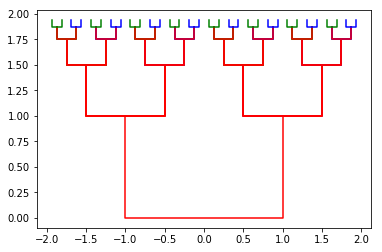

In [172]:
tree = [np.array([-1+1J, -1, 1, 1+1J ])]

for k in range(4):
    
    RB = list(map(lambda z: z/2 -1+1J, tree))
    LB = list(map(lambda z: z/2 +1+1J, tree))
    tree = tree + RB + LB
cols = 'rgb'
for k, edge in enumerate(tree):
    plt_cplx(edge, sty=cols[k%3])

## Arbre de Stern-Brocot

En mathématiques, [l'arbre de Stern-Brocot](https://fr.wikipedia.org/wiki/Arbre_de_Stern-Brocot) est une représentation de tous les rationnels strictement positifs, sous forme de fractions irréductibles.

Il a été découvert presque simultanément par le mathématicien allemand Moritz Stern (1858) et par l'horloger français Achille Brocot (1861).

## Énumération des rationnels

La propriété fondamentale de l'arbre de Stern-Brocot est qu'il contient toutes les fractions irréductibles strictement positives une et une seule fois chacune. On en déduit un procédé pour numéroter tous les rationnels positifs, c'est-à-dire une bijection des rationnels positifs sur les entiers naturels positifs. En bref on associe à un rationnel l'entier dont la représentation en base 2 code le chemin de la racine de l'arbre au rationnel choisi.

**Source : Wiki**


## Suites de Farey

En mathématiques, [la suite de Farey](https://fr.wikipedia.org/wiki/Suite_de_Farey)
d'ordre n est la suite des fractions irréductibles comprises entre 0 et 1, ordonnées en croissant et dont le dénominateur est inférieur ou égal à n. Certains auteurs ne restreignent pas les suites de Farey à l'intervalle de 0 à 1.

Chaque suite de Farey commence avec la valeur 0, décrite par la fraction {\displaystyle 0/1,}0/1, et finit avec la valeur 1, décrite par la fraction {\displaystyle 1/1}1/1 (bien que certains auteurs omettent ces termes). Une suite de Farey est quelquefois appelée série de Farey, ce qui n'est pas véritablement correct, les termes n'étant pas additionnés.

---

Écrire une fonction Python inseremedians(l) qui prend comme argument une liste l de couples d’entiers ( et renvoit la liste de couples où, comme décrit ci-dessus, mi est le médian de $c_i$ et $c_{i+1}$. 

From this [TP](https://www.normalesup.org/~glafon/eiffel16/TPnotecor.pdf)

En déduire une fonction Farey(n) qui prend comme argument un entier n et renvoit la suite de
Farey $F_n$.

---

[This is interesting](https://hal.archives-ouvertes.fr/hal-00765981/document)

In [211]:
rats = np.array([[0,1], [1,1]])
rats

array([[0, 1],
       [1, 1]])

the median is

In [212]:
rats[:-1] + rats[1:]

array([[1, 2]])

in numpy we can do the insertion using indices like this

In [213]:
tmp = np.zeros((2*rats.shape[0]-1,2))
tmp[::2,] = rats
tmp[1::2,] = rats[:-1] + rats[1:]
tmp

array([[0., 1.],
       [1., 2.],
       [1., 1.]])

## The function  using numpy

Compare with [this](https://fr.wikipedia.org/wiki/Suite_de_Farey#Un_algorithme_simple)

In [217]:
def Farey(n):
    rats = np.array([[0,1], [1,1]])
    for k in range(n-1):
        tmp = np.zeros((2*rats.shape[0]-1,2))
        tmp[::2,] = rats
        tmp[1::2,] = rats[:-1] + rats[1:]
        rats = tmp
    return rats

Farey(3)
    

array([[0., 1.],
       [1., 3.],
       [1., 2.],
       [2., 3.],
       [1., 1.]])

In [219]:
rats = Farey(4)
nums, denoms = rats[:,0], rats[:,1]
nums

array([0., 1., 1., 2., 1., 3., 2., 3., 1.])

## Visualising the tree structure 

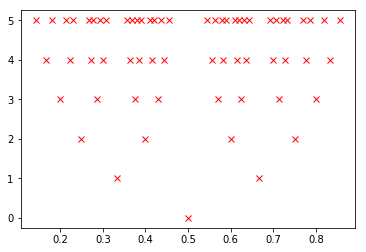

In [3]:
rats = np.array([[0,1], [1,1]])
for k in range(6):
    tmp = np.zeros((2*rats.shape[0]-1,2))
    tmp[::2,] = rats
    tmp[1::2,] = rats[:-1] + rats[1:]
    #fracs = rats[:,0]/rats[:,1]
    fracs = tmp[1::2,0]/tmp[1::2,1]
    plt.plot(fracs, k*np.ones_like(fracs), 'rx')
    rats = tmp

In [229]:
len(rats)

65

In [232]:
rats[::2][:10]

array([[ 0.,  1.],
       [ 1.,  6.],
       [ 1.,  5.],
       [ 2.,  9.],
       [ 1.,  4.],
       [ 3., 11.],
       [ 2.,  7.],
       [ 3., 10.],
       [ 1.,  3.],
       [ 4., 11.]])

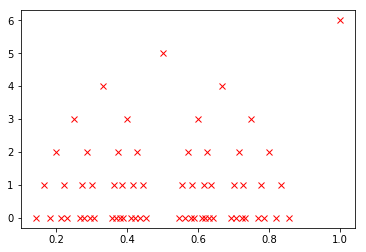

In [6]:
tmp = np.copy(rats)
k = 0
while tmp.shape[0] >= 2:
    fracs = tmp[1::2,0]/tmp[1::2,1]
    plt.plot(fracs, k*np.ones_like(fracs), 'rx')
    tmp = tmp[::2]
    k += 1
    

##  Recursion

If one looks carefully one sees 
that the k-th element of $F_n$
is just the 2k-th element of $F_{n+1}$


$$(F_{n+1})_{2k} = (F_n)_k $$

$$(F_{n+1})_{2k+1} = (F_n)_k  + (F_n)_{k+1}$$


In [14]:
def F(n):
    if n == 0:
         return np.array([[0,1], [1,1]])
    F_prec  = F(n-1)
    F_n = np.zeros((2*F_prec.shape[0]-1,2))
    F_n[::2,] = F_prec
    F_n[1::2,] = F_prec[:-1] + F_prec[1:]
    return F_n

In [15]:
F(2)

array([[0., 1.],
       [1., 3.],
       [1., 2.],
       [2., 3.],
       [1., 1.]])

## Conjecture 

[Tirée dans le TP](https://www.normalesup.org/~glafon/eiffel16/TPnote.pdf)

*On fait la conjecture suivante : dans la suite de Farey $F_n$, <br>
les valeurs prises par la fonction evalue
sur chacun  <br>des couples de la suite sont strictement croissantes.*

$(F_n)_k < (F_n)_{k+1}$$




In [25]:
F_n = F(4)
fracs = F_n[:,0]/F_n[:,1]

In [26]:
diffs = fracs[1:] - fracs[:-1] 
diffs

array([0.2       , 0.05      , 0.03571429, 0.04761905, 0.04166667,
       0.025     , 0.02857143, 0.07142857, 0.07142857, 0.02857143,
       0.025     , 0.04166667, 0.04761905, 0.03571429, 0.05      ,
       0.2       ])

## check no values < 0

In [27]:
diffs[diffs < 0 ]

array([], dtype=float64)

In [24]:
diffs[diffs > 0 ]

array([0.2       , 0.05      , 0.03571429, 0.04761905, 0.04166667,
       0.025     , 0.02857143, 0.07142857, 0.07142857, 0.02857143,
       0.025     , 0.04166667, 0.04761905, 0.03571429, 0.05      ,
       0.2       ])


- ```diffs < 0```
- ```diffs > 0```

are [boolean masks](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html).

[Regarder la video](https://machinelearnia.com/numpy/#indexing)



##  Exo

[Tirée dans le TP](https://www.normalesup.org/~glafon/eiffel16/TPnote.pdf)

Écrire une fonction Python appartientfarey(x,n) 
qui détermine si le
nombre flottant x correspond à la valeur evalue(ci) pour un des couples d’entiers ci de la
suite de Farey Fn. La fonction renverra bien sûr True si c’est le cas, False sinon.

In [64]:

def interval(x, n):
    if n == 0:
        # returning 2 objects
        return np.array([[0,1], [1,1]]), []
    tmp, medians = interval(x, n-1)
    median = tmp[0] + tmp[1]
    medians.append(median)
    if median[0]/median[1] < x:
        tmp[0] = median
    else:
        tmp[1] = median
    return tmp, medians

In [57]:
uu, medians = interval((np.sqrt(5) - 1)/2, 8)
uu[:,0]/uu[:,1]

array([0.61764706, 0.61818182])

## Visualizing the solution

In [58]:
medians = np.array(medians)
mfracs = medians[:,0]/medians[:,1] 
mfracs

array([0.5       , 0.66666667, 0.6       , 0.625     , 0.61538462,
       0.61904762, 0.61764706, 0.61818182])

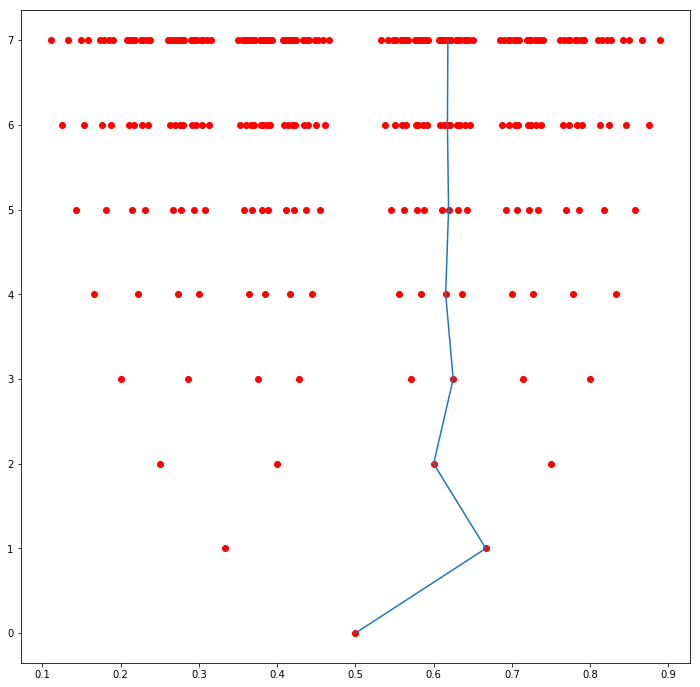

In [62]:

fig, ax = plt.subplots()
fig.set_size_inches(12,12)

rats = np.array([[0,1], [1,1]])
for k in range(8):
    tmp = np.zeros((2*rats.shape[0]-1,2))
    tmp[::2,] = rats
    tmp[1::2,] = rats[:-1] + rats[1:]
    #fracs = rats[:,0]/rats[:,1]
    fracs = tmp[1::2,0]/tmp[1::2,1]
    ax.plot(fracs, k*np.ones_like(fracs), 'ro')
    rats = tmp
    
ax.plot(mfracs, np.arange(len(mfracs)) )

## Crible d'Ératosthène

Crible d'Ératosthène¶
Le crible d'Ératosthène est un procédé qui permet de trouver tous les nombres premiers inférieurs à un certain entier naturel donné N. Le crible d'Atkin est plus rapide mais plus complexe.Le crible d'Ératosthène est un procédé qui permet de trouver tous les nombres premiers inférieurs à un certain entier naturel donné N. Le crible d'Atkin est plus rapide mais plus complexe.

In [74]:
Crible d'Ératosthène¶
Le crible d'Ératosthène est un procédé qui permet de trouver tous les nombres premiers inférieurs à un certain entier naturel donné N. Le crible d'Atkin est plus rapide mais plus complexe.

#https://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n
def primes(n):
    """ Returns  array of primes, 2 <= p < n """
    sieve = np.ones(n, dtype=np.bool)
    sieve[::2] = False
    for i in range(3, int(np.sqrt(n))+1, 2):
        if sieve[i]:
            sieve[i*i::i] = False
    return np.nonzero(sieve)[0][1:]

In [76]:
primes(100)

array([ 3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
       67, 71, 73, 79, 83, 89, 97])

In [77]:
! ../.g

[master 1deb818] web
 1 file changed, 51 insertions(+), 18 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 950 bytes | 950.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io
   42ddf35..1deb818  master -> master
